# Practical 7
#### [ ID: 17CE016 ]
---
#### Aim: Clustering Greatest Movies of All Time Clustering News Articles

#### Theory:

**Methods Used**
1. Principal Component Analysis: Principal Component Analysis was used to counter curse of dimensionality. Escaping the curse was crucial for our clustering algorithms because reduced dimension have three fold benefits :- 1) Lighter Computational Workload 2)Less Dimensional redundancy 3) More Effective Distance Metrics. PCA is dimension-reduction tool that is used to reduce a large set of variables to a small number of factors while preserving the variance between the data points.

2. K-Means: K means clustering is an unsupervised clustering algorithm that groups n different observations into k unique clusters where k < n. The algorithm clusters data points of similar features based on some parameter, usually Euclidean distance. Clusters are formed in a way to maximize inter cluster similarity. This can be achieved by minimizing within cluster sum of squares,<br>defined as<br>
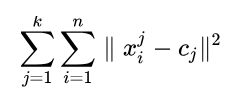
    
    K means algorithm requires the practitioner to enter the value of parameter k. The optimum value of k can be chosen based on sum of squared error (SSE) or advanced statistical measures such as gap statistic.

    Nonetheless, analytical methods often result in complicated clusters. Since, clustering requires human interpretation to make conclusions its easier if the number of instances in a particular cluster is less. The k means algorithm presented in the paper employed euclidean distance for clustering. The parameter k was set to 13 for two reasons. First, DBSCAN algorithm gave the best results for k = 13. Generally, distance based clustering algorithms performs quite poorly on such datasets. One reasonable explanation for the former statement is the exponential increase in euclidean distance as dimension grows. Principal component analysis was used for dimension reduction to minimize the effect of curse of dimensionality. However, it was still difficult to understand the association between movies. Some observable patterns exist between movies belonging to the same cluster but these patterns cannot be generalized for all the data points in the cluster.
    
3. DB-SCAN Clustering: DB-SCAN is a clustering algorithm that focuses on separating clusters of high density from low density. Thus, it is a Density Based Clusetring Algorithm which sorts the data into clusters of varying shape. The basic idea is that if a point belongs to a cluster then it must be near to a lot of other points which are also in that cluster. DBSCAN Algorithm takes up two parameters- first is a positive number epsilon and second is the minimum number of points. Randomly points are picked from the dataset and if there are more than minimum number of points within a distance a of epsilon from the selected point then they all are assigned to one same cluster. Then other points are selected checking whether they too have more than minimum number of points within an epsilon distance so that they could be added to the cluster. When all of the points are exhausted, a point is again selected at random and the whole process is repeated again.

---

In [13]:
# import urllib2
from bs4 import BeautifulSoup
import requests
from requests import get
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import datetime as dt
import string
from matplotlib import pyplot as plt
sns.set(style="ticks")

import nltk
from nltk.stem.snowball import SnowballStemmer 
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn


pd.set_option('display.notebook_repr_html', True)
sns.set(style="ticks")
%matplotlib inline


import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster') 


The First part will be to collect all the imdb ids of the top 250 movies. We have done this by scrapping imdb's webpage.

In [14]:
url='http://www.imdb.com/chart/top'
page=get(url).content
soup=BeautifulSoup(page,'html.parser')
class_=soup.find_all(name='div',attrs={'class':'wlb_ribbon'})
movie_ids=[c['data-tconst'] for c in class_]

The movie_ids is a list of the top 250 movie ids of imdb.

We will be using omdb for data collection. The data will be collected from omdb's api.

In [15]:
movie_info=[[] for i in range(len(movie_ids))]

for i in range(250):
    url='http://www.omdbapi.com/?i='
    r=requests.get(url+movie_ids[i]+"&apikey=de12b217").json()
    for a in r.keys():
        movie_info[i].append(r[a])
        
df_omdb=pd.DataFrame(movie_info,columns=r.keys())

In [16]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,English,USA,Nominated for 7 Oscars. Another 21 wins & 35 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,217,195",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,532,092",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,N/A,True
2,The Godfather: Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,072,495",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,N/A,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",When the menace known as the Joker wreaks havo...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 159 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,200,152",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,Drama,Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",A jury holdout attempts to prevent a miscarria...,English,USA,Nominated for 3 Oscars. Another 16 wins & 9 no...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"650,851",tt0050083,movie,06 Mar 2001,N/A,Criterion Collection,N/A,True


Now we have collected all of the information from the omdb database. To get a more richer dataset of movies we will now try to get the database from imdb.

In [17]:
url='http://www.imdb.com/title/'
t='/plotsummary?ref_=tt_stry_pl'
plot=[[] for i in range(len(movie_ids))]
for i in range(250):
    page=get(url+df_omdb.imdbID[i]+t).content
    soup=BeautifulSoup(page,'html.parser')
    class_=soup.find_all(name='li',attrs={'class':'ipl-zebra-list__item'})
    for j in class_:
        plot[i].append(j.get_text(strip = True))


In [18]:
df_omdb['Plot']=plot
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,The Shawshank Redemption,1994,R,14 Oct 1994,142 min,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Two imprisoned men bond over a number of year...,English,USA,Nominated for 7 Oscars. Another 21 wins & 35 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,217,195",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True
1,The Godfather,1972,R,24 Mar 1972,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,532,092",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,N/A,True
2,The Godfather: Part II,1974,R,18 Dec 1974,202 min,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,072,495",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,N/A,True
3,The Dark Knight,2008,PG-13,18 Jul 2008,152 min,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[When the menace known as the Joker wreaks hav...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 159 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,200,152",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,N/A,True
4,12 Angry Men,1957,Approved,10 Apr 1957,96 min,Drama,Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",[A jury holdout attempts to prevent a miscarri...,English,USA,Nominated for 3 Oscars. Another 16 wins & 9 no...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"650,851",tt0050083,movie,06 Mar 2001,N/A,Criterion Collection,N/A,True


### Cleaning the dataset


First step in cleaning the data is to convert Year to a categorical variable. Year 1990 was chosen as a suitable cutoff. Movies released before 1990 became 0 and after 1990 became 1. After doing this we performed one hot encoding and added dummy variables of Year(now 0,1) in the dataframe.

In [19]:
df_omdb.Year=pd.to_numeric(df_omdb.Year)
for i in range(250):
    if df_omdb.Year[i]<1990:
        df_omdb.Year[i]=0
    else:
        df_omdb.Year[i]=1
dummy_year=pd.get_dummies(df_omdb.Year)

for i in range(250):
    df_omdb.Runtime[i]=df_omdb.Runtime[i].split()[0]

c:\users\kirtan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kirtan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\kirtan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

Next step is to convert Runtime to a categorical variable. A Runtime of 125 mins was chosen as a suitable cutoff because it was the median value all datapoints. Movies having a runtime less than 125 mins became 0 and greater than 125 mins became 1.

In [21]:
df_omdb['Runtime']=pd.to_numeric(df_omdb['Runtime'],errors='coerce')
for i in range(250):
    if df_omdb.Runtime[i]<=125:
        df_omdb.Runtime[i]=0
    else: 
        df_omdb.Runtime[i]=1
    


c:\users\kirtan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kirtan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [22]:
def clean(column_name):
    """This function takes a column from the dataframe and splits two elements
       if they are separated by a comma.
       For ex. in Actors column there might be values such as Christian Bale, Morgan Freeman.
       This will separate these two actors and store them individually in a list."""
    name=set()
    for name_string in df_omdb[column_name]:
        name.update(name_string.split(', '))
    name=sorted(name)
    return name

def top(column_name):
    """This function takes its input as name of the column and returns a sorted list of the 
       elements which occur very frequently in that column in descending order."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    return nlt.index
    
def plot_column(column_name,n_elem_display=0):
    """ This function is used to plot a bar graph of a column of the dataframe.
        It takes its argument as name of column and number of elements to display and
        return a bar graph of the user defined number of top elements which occur
        frequently in that column."""
    
    name=clean(column_name)
    dummy_name=pd.DataFrame()
    for n in name:
        dummy_name[n]=[int(n in nm.split(', ')) for nm in df_omdb[column_name]] 
    
    namelist=[n for n in name]
    nlt=dummy_name[namelist].sum()
    nlt=nlt.sort_values(axis=0,ascending=False)
    if n_elem_display !=0:
        return nlt[:n_elem_display].plot(kind = "bar",figsize=(10,10))
    else:
        return nlt[:].plot(kind = "bar",figsize=(10,5))
        

Plotting all of the genres

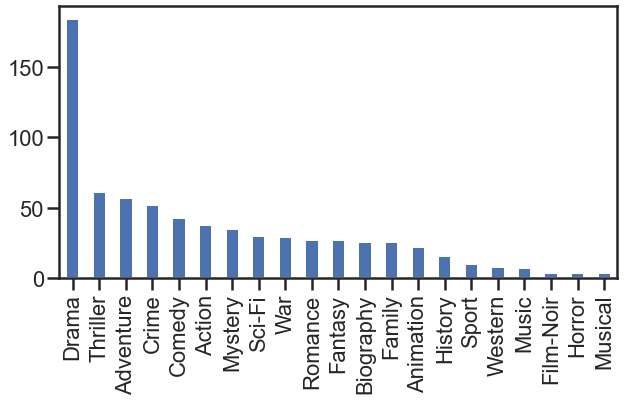

In [23]:
plot_column('Genre')

We will be choosing all of the genres as our predictors in our dataset

In [24]:
#Get the unique genres contained in the dataframe
genres=clean('Genre')
#Add one column for every genre in the dataframe
for genre in genres:
    df_omdb["genre:"+genre] = [int(genre in g.split(', ')) for g in df_omdb.Genre]

In [25]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western
0,The Shawshank Redemption,1,R,14 Oct 1994,1,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Two imprisoned men bond over a number of year...,English,USA,Nominated for 7 Oscars. Another 21 wins & 35 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,217,195",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,532,092",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,0,R,18 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,072,495",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[When the menace known as the Joker wreaks hav...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 159 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,200,152",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictures/Legendary,N/A,True,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,12 Angry Men,0,Approved,10 Apr 1957,0,Drama,Sidney Lumet,"Reginald Rose (story), Reginald Rose (screenplay)","Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",[A jury holdout attempts to prevent a miscarri...,English,USA,Nominated for 3 Oscars. Another 16 wins & 9 no...,https://m.media-amazon.com/images/M/MV5BMWU4N2...,"[{'Source': 'Internet Movie Database', 'Value'...",96,8.9,"650,851",tt0050083,movie,06 Mar 2001,N/A,Criterion Collection,N/A,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Now let us analyze the number of actors that can be used as predictors in our datset

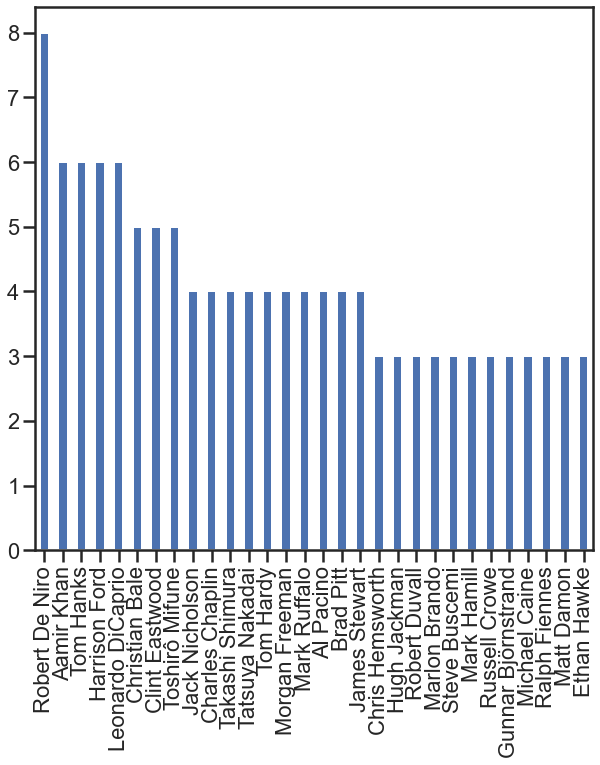

In [26]:
plot_column('Actors',30)

##### Thus, we can take the top 30 actors each having more than 3 movies in the top 250 movie list of imdb.

In [27]:
#Adding actors to our dataset
actors=top('Actors')
actors
for actor in actors[:30]:
    df_omdb["Actor:"+actor] = [int(actor in a.split(', ')) for a in df_omdb.Actors]
        

##### Now let us analyze the directors in our dataset

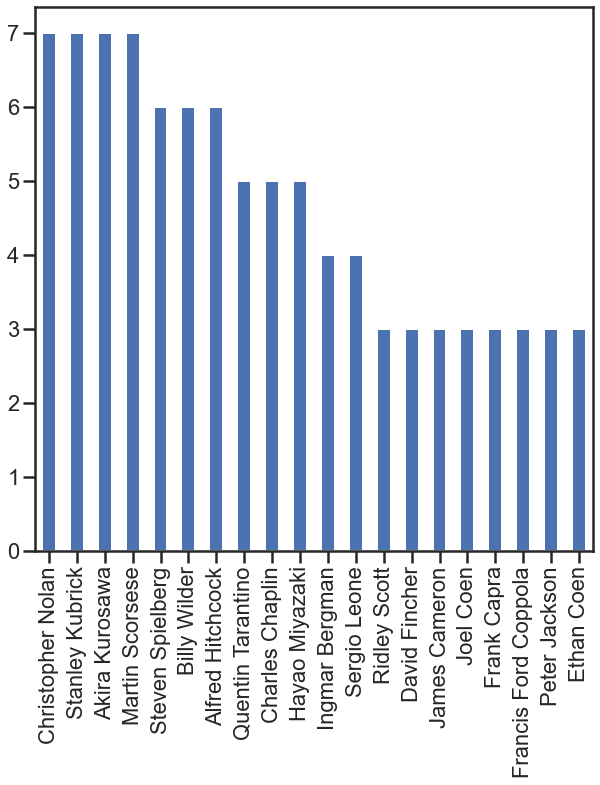

In [28]:
plot_column('Director',20)

##### Thus, we can take the top 20 directors each having more than 3 movies in the top 250 movie list of imdb.

In [29]:
directors=top('Director')
    
for director in directors[:20]:
    df_omdb["Director:"+director] = [int(director in d.split(', ')) for d in df_omdb.Director]    

##### Analyzing whether to take writers or not as predictors.

In [30]:
writers1=set()
writers2=set()
for writer_string in df_omdb.Writer:
    writers1.update(writer_string.split(', '))
for j in writers1:
    writers2.update(j.rsplit(' (')[:1])
writers2 = sorted(writers2)

dummy_writers=pd.DataFrame()

# Add one column for every writer in the dataframe
for writer in writers2:
    dummy_writers[writer] = [int(writer in w.split(', ')) for w in df_omdb.Writer]   
dummy_writers   

,Gamora & Drax created by),Gamora and Drax created by),Vengeance Trilogy),Aaron Guzikowski,Abby Mann,Abhijat Joshi,Adam Elliot,Adolfo Franci,Adolph Green,Adrian Molina,Agatha Christie,Agenore Incrocci,Akhilesh Jaiswal,Akira Kurosawa,Akiva Goldsman,Akiyuki Nosaka,Al Boasberg,Alan Ball,Alan Mak,Albert Hackett,Alec Coppel,Alec Sokolow,Ales Adamovich,Amole Gupte,Amy Poehler,Andrei Tarkovsky,Andrew Kevin Walker,Andrew Knight,Andrew Niccol,Andrew Stanton,Andrey Konchalovskiy,Andy Gaskill,Anthony Burgess,Anthony Tambakis,Anton Chekhov,Anurag Kashyap,Arijit Biswas,Arkadiy Strugatskiy,Arthur C. Clarke,Asghar Farhadi,Ashley Montagu,Ashutosh Gowariker,B. Traven,Barry Johnson,Ben Affleck,Bernardo Bertolucci,Bernd Eichinger,Betty Comden,Bill Finger,Bill Hader,...,Terence Winter,Terry George,Terry Gilliam,Terry Jones,Terry Rossio,Terry Southern,Thea von Harbou,Thom Enriquez,Thomas Harris,Thomas Keneally,Thomas Narcejac,Thomas Vinterberg,Tobias Lindholm,Todd Phillips,Tom McCarthy,Tom Schulman,Tom Sito,Traudl Junge,Uma Thurman,Upendra Sidhaye,Upton Sinclair,Valérie Beaugrand-Champagne,Vanna Paoli,Vidhu Vinod Chopra,Vincenzo Cerami,Vittorio De Sica,W.R. Burnett,Wajdi Mouawad,Walter Donohue,Walter Hill,Walter Newman,Wes Anderson,William Davies,William Goldman,William Makepeace Thackeray,William Monahan,William Nicholson,William Shakespeare,William Wisher,Winston Groom,Wladyslaw Szpilman,Wolfgang Petersen,Yasuhiko Takiguchi,Yasujirô Ozu,Yavuz Turgul,Yogesh Chandekar,Zach Lewis,Zeishan Quadri,Çagan Irmak,Éric Toledano
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Plotting the above writers on a bar graph.

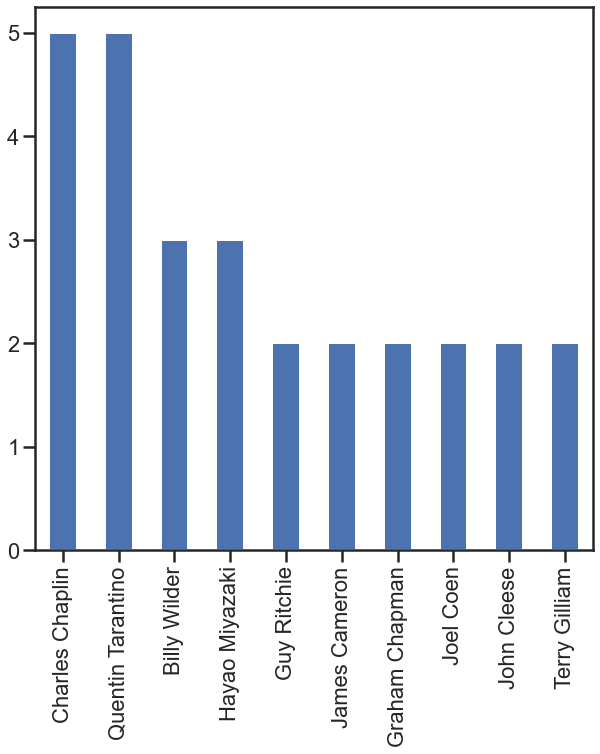

In [31]:
writerlist=[w for w in writers2]
wlt=dummy_writers[writerlist].sum()
wlt=wlt.sort_values(axis=0,ascending=False)
wlt.iloc[0:10].plot(kind = "bar",figsize=(10,10))

Since, not many writers are there having significant number of movies, thus we decided not to take writers as one of our predictors.

Now, we will explore the predictor langugae

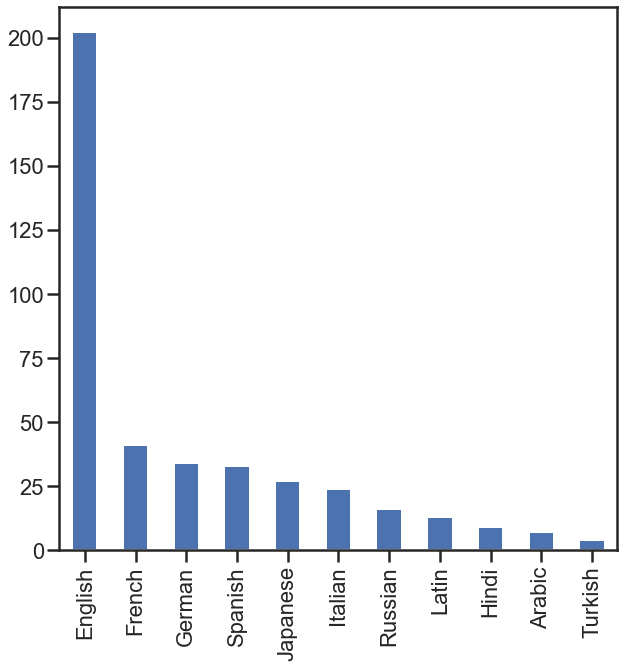

In [32]:
plot_column('Language',11)

Based on the graph we will take the top 11 languages as predictos we decided not to take language as predictor because it does not provide any distinguishing characteristic for clustering

In [33]:
df_omdb.shape

(250, 96)

Now, let us analyze Country of the movie 

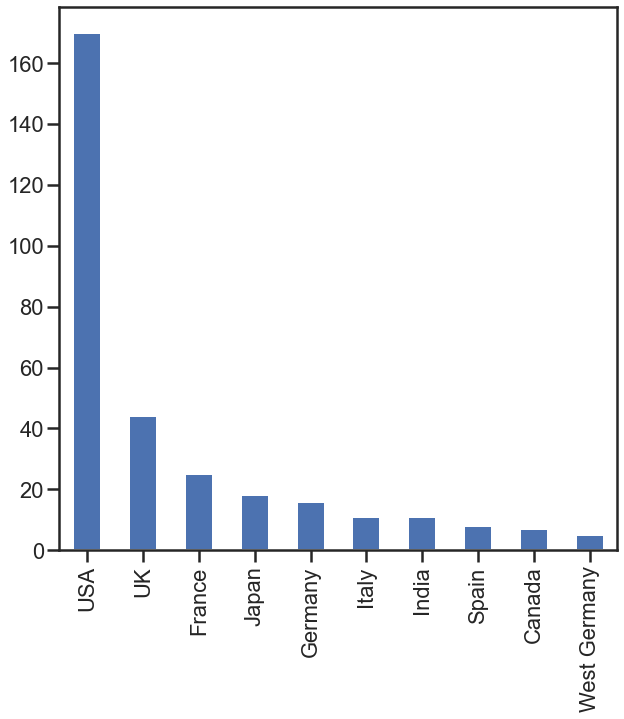

In [34]:
plot_column('Country',10)

We will select the top 10 countries as our predictors

In [35]:
#Adding all of the top 10 countries to our datset
countries=top('Country')

for country in countries[:10]:
    df_omdb["Country:"+country] = [int(country in c.split(', ')) for c in df_omdb.Country]

In [36]:
df_omdb.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Actor:Robert De Niro,Actor:Aamir Khan,Actor:Tom Hanks,Actor:Harrison Ford,...,Actor:Takashi Shimura,Actor:Tatsuya Nakadai,Actor:Tom Hardy,Actor:Morgan Freeman,Actor:Mark Ruffalo,Actor:Al Pacino,Actor:Brad Pitt,Actor:James Stewart,Actor:Chris Hemsworth,Actor:Hugh Jackman,Actor:Robert Duvall,Actor:Marlon Brando,Actor:Steve Buscemi,Actor:Mark Hamill,Actor:Russell Crowe,Actor:Gunnar Björnstrand,Actor:Michael Caine,Actor:Ralph Fiennes,Actor:Matt Damon,Actor:Ethan Hawke,Director:Christopher Nolan,Director:Stanley Kubrick,Director:Akira Kurosawa,Director:Martin Scorsese,Director:Steven Spielberg,Director:Billy Wilder,Director:Alfred Hitchcock,Director:Quentin Tarantino,Director:Charles Chaplin,Director:Hayao Miyazaki,Director:Ingmar Bergman,Director:Sergio Leone,Director:Ridley Scott,Director:David Fincher,Director:James Cameron,Director:Joel Coen,Director:Frank Capra,Director:Francis Ford Coppola,Director:Peter Jackson,Director:Ethan Coen,Country:USA,Country:UK,Country:France,Country:Japan,Country:Germany,Country:Italy,Country:India,Country:Spain,Country:Canada,Country:West Germany
0,The Shawshank Redemption,1,R,14 Oct 1994,1,Drama,Frank Darabont,"Stephen King (short story ""Rita Hayworth and S...","Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",[Two imprisoned men bond over a number of year...,English,USA,Nominated for 7 Oscars. Another 21 wins & 35 n...,https://m.media-amazon.com/images/M/MV5BMDFkYT...,"[{'Source': 'Internet Movie Database', 'Value'...",80,9.3,"2,217,195",tt0111161,movie,27 Jan 1998,N/A,Columbia Pictures,N/A,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,The Godfather,0,R,24 Mar 1972,1,"Crime, Drama",Francis Ford Coppola,"Mario Puzo (screenplay by), Francis Ford Coppo...","Marlon Brando, Al Pacino, James Caan, Richard ...",[The aging patriarch of an organized crime dyn...,"English, Italian, Latin",USA,Won 3 Oscars. Another 26 wins & 30 nominations.,https://m.media-amazon.com/images/M/MV5BM2MyNj...,"[{'Source': 'Internet Movie Database', 'Value'...",100,9.2,"1,532,092",tt0068646,movie,09 Oct 2001,N/A,Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,The Godfather: Part II,0,R,18 Dec 1974,1,"Crime, Drama",Francis Ford Coppola,"Francis Ford Coppola (screenplay by), Mario Pu...","Al Pacino, Robert Duvall, Diane Keaton, Robert...",[The early life and career of Vito Corleone in...,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 11 wins & 20 nominations.,https://m.media-amazon.com/images/M/MV5BMWMwMG...,"[{'Source': 'Internet Movie Database', 'Value'...",90,9.0,"1,072,495",tt0071562,movie,24 May 2005,N/A,Paramount Pictures,N/A,True,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,The Dark Knight,1,PG-13,18 Jul 2008,1,"Action, Crime, Drama, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","Christian Bale, Heath Ledger, Aaron Eckhart, M...",[When the menace known as the Joker wreaks hav...,"English, Mandarin","USA, UK",Won 2 Oscars. Another 153 wins & 159 nominations.,https://m.media-amazon.com/images/M/MV5BMTMxNT...,"[{'Source': 'Internet Movie Database', 'Value'...",84,9.0,"2,200,152",tt0468569,movie,09 Dec 2008,"$533,316,061",Warner Bros. Pictur

### Plot Processing

In the next stage we will first clean and tokenize the plot of every movie and try to extract words which can be used as features in our clustering algorithm.

In [37]:
## Function for text cleaning,tokenizing,lemmatizing and POS Tagging

def my_analyzer(s):
# Synonym List
    syns = {'wont':'would not', 'cant':'can not', 'cannot':'can not', \
    'couldnt':'could not', 'shouldnt':'should not', \
    'wouldnt':'would not', 'straightforward': 'straight forward' }
    # Preprocess String s
    s = s.lower()
    #Replace special characters with spaces
    s = s.replace('-', ' ')
    s = s.replace('_', ' ')
    s = s.replace(',', '. ')
    s = s.replace('\\',"")
    s = s.replace('.',"")

    # Replace not contraction with not
    s = s.replace("'nt", " not")
    s = s.replace("n't", " not")

    # Tokenize
    tokens = word_tokenize(s)

    #tokens = [word.replace(',','') for word in tokens ]

    tokens = [word for word in tokens if ('*' not in word) and \
    ("''" != word) and ("``" != word) and \
    (word!='description') and (word !='dtype') \
    and (word != 'object') and (word!="'s")]

    # Map synonyms
    for i in range(len(tokens)):
        if tokens[i] in syns:
            tokens[i] = syns[tokens[i]]

    # Remove stop words
    punctuation = list(string.punctuation)+['..', '...']
    pronouns = ['i', 'he', 'she', 'it', 'him', 'they', 'we', 'us', 'them','he ']
    others = ["'d", "co", "ed", "put", "say", "get", "can", "become",\
            "los", "sta", "la", "use","ask" "iii", "else","doesn't","dr.","well","let","soon","finally","around","little",\
              "would","set","use","place","still","three","arrive","next","anoth","keep","must","mr.","bring",\
              "much","many","eventually","explain","asks","along","may","small","hold","realize","think","continue",\
             "last","behind","discover","something","several","end","large","high","mr","the","dr","mr"]
    names = ["harry","travis","tommy","joe","jack","dorothy","mike","george","frank","frankie",\
            "frank ","sarah","andrew","taylor","arthur","luke","kane","wallace","parker","danny","tony",\
            "michael","luke","kane","danny","john","max","tom","paul","ca","neil","maria","barry","anna","jerry",\
            "alex","terry","henry","gordon","leonard","wayne","vincent","jimmy","jordan","sam","nick","nicholson",\
            "jake","rocky"]

    stop = stopwords.words('english') + punctuation + pronouns + others + names
    filtered_terms = [word for word in tokens if (word not in stop) and \
    (len(word)>1) and (not word.replace('.','',1).isnumeric()) \
    and (not word.replace("'",'',2).isnumeric())]

    # Lemmatization & Stemming - Stemming with WordNet POS
    # Since lemmatization requires POS need to set POS
    tagged_words = pos_tag(filtered_terms, lang='eng')

    # Stemming with for terms without WordNet POS
    stemmer = SnowballStemmer("english")
    wn_tags = {'N':wn.NOUN, 'J':wn.ADJ, 'V':wn.VERB, 'R':wn.ADV}
    wnl = WordNetLemmatizer()
    stemmed_tokens = []
    for tagged_token in tagged_words:
        term = tagged_token[0]
        pos = tagged_token[1]
        pos = pos[0]
        try:
            pos = wn_tags[pos]
            stemmed_tokens.append(wnl.lemmatize(term, pos=pos))
        except:
            stemmed_tokens.append(stemmer.stem(term))
    return stemmed_tokens


In [38]:
n_plots = len(df_omdb['Plot']) # Number of Plots
s_words = 'english' # Stop Word Dictionary
ngram = (1,3) # n-gram POS modeling
plots = df_omdb['Plot'].map(str) # place all text reviews in reviews
tfidf=True

In [42]:
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

# Create Word Frequency by Review Matrix using Custom Analyzer
cv = CountVectorizer(max_df=0.9, min_df=3, max_features=None ,\
analyzer=my_analyzer, ngram_range=ngram)
tf1 = cv.fit_transform(plots)
terms1 = cv.get_feature_names()
term_sums = tf1.sum(axis=0)
term_counts = []
out1 = []
out2 = []
for i in range(len(terms1)):
    term_counts.append([terms1[i], term_sums[0,i]])
def sortSecond(e):
    return e[1]
term_counts.sort(key=sortSecond, reverse=True)
print("\nTerms with Highest Frequency:")
for i in range(400):
    print('{:<15s}{:>5d}'.format(term_counts[i][0], term_counts[i][1]))
    out1.append([term_counts[i][0], term_counts[i][1]])
np.savetxt("frequency_100.csv", out1, delimiter=",", fmt='%s')
print("")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kirtan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.



Terms with Highest Frequency:
tell            2147
find            1710
back            1371
see             1369
man             1236
say             1078
time            1041
two             1034
kill            1001
try              995
come             992
give             992
life             903
know             865
call             804
men              791
look             777
get              774
day              747
new              745
begin            736
year             734
father           728
want             725
work             724
return           697
meet             695
room             689
away             682
name             665
run              661
help             652
also             642
home             642
car              617
old              604
like             595
way              587
head             575
police           575
however          567
wife             565
young            563
family           562
turn             562
first            559
fri

After calculating word frequency we will now calculate TF-IDF score of every word to see and extract which words have a higher score and can be used as features in clustering.

In [43]:
# if tfidf is requested, replace tf matrix with frequencies weighted by IDF
if tfidf == True:
    # Construct the TF/IDF matrix from the data
    print("Conducting Term/Frequency Matrix using TF-IDF")
    tfidf_vect = TfidfVectorizer(max_df=0.7, min_df=5, \
    max_features=None,\
    analyzer=my_analyzer, ngram_range=ngram)
    tf = tfidf_vect.fit_transform(plots)
    terms = tfidf_vect.get_feature_names()
    term_idf_sums = tf.sum(axis=0)
    term_idf_scores = []
    for i in range(len(terms)):
        term_idf_scores.append([terms[i], term_idf_sums[0,i]])
    print("The Term/Frequency matrix has", tf.shape[0], " rows, and",\
        tf.shape[1], " columns.")
    print("The Term list has", len(terms), " terms.")
    term_idf_scores.sort(key=sortSecond, reverse=True)
    print("\nTerms with Highest TF-IDF Scores:")
    for i in range(100):
        print('{:<15s}{:>8.2f}'.format(term_idf_scores[i][0], \
        term_idf_scores[i][1]))
        out2.append([term_idf_scores[i][0], term_idf_scores[i][1]])
        np.savetxt("tfidf1_100.csv", out2, delimiter=",", fmt='%s')
        
    

Conducting Term/Frequency Matrix using TF-IDF
The Term/Frequency matrix has 250  rows, and 5396  columns.
The Term list has 5396  terms.

Terms with Highest TF-IDF Scores:
kill               7.07
father             7.04
family             6.04
police             5.82
men                5.74
son                5.42
child              5.32
wife               5.12
car                5.05
old                4.83
mother             4.83
young              4.82
home               4.79
friend             4.78
room               4.72
woman              4.64
love               4.57
war                4.54
boy                4.53
money              4.44
run                4.32
live               4.12
train              4.11
german             4.07
night              4.05
house              4.03
film               3.93
fight              3.92
brother            3.90
girl               3.87
story              3.85
world              3.80
murder             3.77
show               3.76
gang        

In [44]:
## Creating a dataframe of all frequent words from count_vectorizer
k = tf1.todense()
freq = pd.DataFrame(k,columns = terms1)
freq_words = freq.sum(axis = 0)
freq = freq.append(freq_words,ignore_index = True)

In [45]:
## Transposing and rearranging
freq.t = freq.T
freq.t = freq.t.reset_index()
freq.t = freq.t.drop(['index'],axis = 1)
freq.t.index = terms1
freq.t.columns.values[250] = "freq_sum"
freq.t = freq.t.sort_values("freq_sum",ascending = False)

c:\users\kirtan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [46]:
## Taking top words from the entire dataframe
words_df = freq.t.T
top_words = ["young", "man", "help", "life", "war", "police", "family", "journey", 
             "jewish", "son", "boy", "world", "love", "save", "dark", "friends", "murder"]
df = words_df[top_words]

df_encoded = df
df_encoded[df_encoded!=0] = 1

c:\users\kirtan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kirtan\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [47]:
df_final2 = pd.concat([df_omdb, df_encoded], axis=1)
df_final2 = df_final2.drop(['Released','Genre','Director','Writer','Actors','Plot','Language',\
                          'Country','Awards','Poster','Ratings','Metascore','imdbVotes','imdbID','Type',\
                         'DVD','BoxOffice','Production','Website','Response','Rated','imdbRating'],axis = 1)

In [48]:
df_final2.dropna(inplace=True)
print(df_final2.shape)
df_final2.head()
df_dbscan=df_final2

(250, 101)


As you've noticed, there are 101 features (see the df_final2 shape). Put differently, each movie has 101 dimensions.
Modelling such a dataset is very difficult because it has only 250 data points and 101 dimensions. To counter this we have first performed PCA and reduced the dimension of the dataset.


### Clustering

Since the number of features in the dataset are very high, we first have to perform PCA to reduce it to a suitable number so as to avoid the curse of dimensionality.

##### PCA

Before applying the PCA algorithm we have to standardize our features.

In [49]:
df_final2.head()

,Title,Year,Runtime,genre:Action,genre:Adventure,genre:Animation,genre:Biography,genre:Comedy,genre:Crime,genre:Drama,genre:Family,genre:Fantasy,genre:Film-Noir,genre:History,genre:Horror,genre:Music,genre:Musical,genre:Mystery,genre:Romance,genre:Sci-Fi,genre:Sport,genre:Thriller,genre:War,genre:Western,Actor:Robert De Niro,Actor:Aamir Khan,Actor:Tom Hanks,Actor:Harrison Ford,Actor:Leonardo DiCaprio,Actor:Christian Bale,Actor:Clint Eastwood,Actor:Toshirô Mifune,Actor:Jack Nicholson,Actor:Charles Chaplin,Actor:Takashi Shimura,Actor:Tatsuya Nakadai,Actor:Tom Hardy,Actor:Morgan Freeman,Actor:Mark Ruffalo,Actor:Al Pacino,Actor:Brad Pitt,Actor:James Stewart,Actor:Chris Hemsworth,Actor:Hugh Jackman,Actor:Robert Duvall,Actor:Marlon Brando,Actor:Steve Buscemi,Actor:Mark Hamill,Actor:Russell Crowe,Actor:Gunnar Björnstrand,...,Actor:Ralph Fiennes,Actor:Matt Damon,Actor:Ethan Hawke,Director:Christopher Nolan,Director:Stanley Kubrick,Director:Akira Kurosawa,Director:Martin Scorsese,Director:Steven Spielberg,Director:Billy Wilder,Director:Alfred Hitchcock,Director:Quentin Tarantino,Director:Charles Chaplin,Director:Hayao Miyazaki,Director:Ingmar Bergman,Director:Sergio Leone,Director:Ridley Scott,Director:David Fincher,Director:James Cameron,Director:Joel Coen,Director:Frank Capra,Director:Francis Ford Coppola,Director:Peter Jackson,Director:Ethan Coen,Country:USA,Country:UK,Country:France,Country:Japan,Country:Germany,Country:Italy,Country:India,Country:Spain,Country:Canada,Country:West Germany,young,man,help,life,war,police,family,journey,jewish,son,boy,world,love,save,dark,friends,murder
0,The Shawshank Redemption,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1
1,The Godfather,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,1,0,1,1,0,0,0,1
2,The Godfather: Part II,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0,1
3,The Dark Knight,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1
4,12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,1


In [52]:
df_matrix = df_final2.drop('Title',axis=1).to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_matrix)
df_matrix=scaler.transform(df_matrix)

In [53]:
df_matrix

array([[ 0.90088523,  0.96076892, -0.42337369, ..., -0.63599873,
         2.13437475,  1.35680105],
       [-1.1100193 ,  0.96076892, -0.42337369, ..., -0.63599873,
        -0.46852129,  1.35680105],
       [-1.1100193 ,  0.96076892, -0.42337369, ..., -0.63599873,
        -0.46852129,  1.35680105],
       ...,
       [-1.1100193 , -1.040833  , -0.42337369, ..., -0.63599873,
        -0.46852129,  1.35680105],
       [ 0.90088523,  0.96076892, -0.42337369, ..., -0.63599873,
        -0.46852129, -0.73702773],
       [-1.1100193 ,  0.96076892, -0.42337369, ..., -0.63599873,
        -0.46852129, -0.73702773]])

In [54]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca39 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum39=sum(pca39.explained_variance_ratio_)
print (sum39/sumall)

38
['0.04', '0.04', '0.04', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.7403665289328799


Applying PCA on the standardized features.

In [55]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_matrix)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print(len(top_PCA))
print(top_PCA)
sumall=sum(pca.explained_variance_ratio_)

pca39 = PCA(n_components=len(top_PCA)).fit(df_matrix)
sum39=sum(pca39.explained_variance_ratio_)
print (sum39/sumall)

38
['0.04', '0.04', '0.04', '0.03', '0.03', '0.03', '0.03', '0.03', '0.03', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.02', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01', '0.01']
0.7403665289328799


First component explains the highest i.e 4% of variance in our data. We have selected those components which explain 1% or more variation in our dataset. Thus, we endup with 39 components out of 101 which explain 74.35% variation in our dataset.

We can also check which features were most important for the first principal component.

In [56]:
first_comp = pca39.components_[0]
first_comps = pd.DataFrame(list(zip(first_comp, df_final2.columns)), columns=['weights', 'features'])
first_comps['abs_weights']=first_comps['weights'].apply(lambda x: np.abs(x))
first_comps.sort_values('abs_weights', ascending=False,inplace=True)

Top_39_features=first_comps
Top_39_features

,weights,features,abs_weights
3,0.327851,genre:Action,0.327851
10,0.312921,genre:Family,0.312921
4,0.305852,genre:Adventure,0.305852
8,-0.273464,genre:Crime,0.273464
9,0.270668,genre:Drama,0.270668
...,...,...,...
52,-0.005791,Actor:Matt Damon,0.005791
48,0.005092,Actor:Russell Crowe,0.005092
74,-0.004425,Country:USA,0.004425
54,0.002211,Director:Christopher Nolan,0.002211


Here we observe that Action movies have the highest weight and is above family, crime and drama. We observe that Charlie Chaplin and Robert De Niro have also been assigned high weights among actors which makes sense because they have maximum number of movies in IMDB's Top 250.

## DBScan Clustering

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Xpca=pca39.transform(df_matrix)

for eps in [0.5,1,2,3,4,5,6,7,8,9,10,11]:
    for min_samples in range(1,50):
        db = DBSCAN(eps=eps, min_samples=min_samples)
        y = db.fit_predict(Xpca)
        if len(set(db.labels_))>4 and len(set(db.labels_))<249:
            print (str(eps) + " " + str(min_samples) + ": "+ str(silhouette_score(Xpca, db.labels_, metric='euclidean')))
            


2 1: 0.007274112378481423
3 1: 0.030598252184685974
3 2: -0.25094840468336854
3 3: -0.27357703082039025
4 1: 0.04571198985588835
4 2: -0.08687618840140625
4 3: -0.1121911328754253
5 1: 0.08167575082314198
5 2: 0.05701350971649814
5 3: 0.007548317793978745
5 4: -0.03635973748098226
6 1: 0.09062022513609778
6 2: 0.13707163158993638
6 3: 0.095238634571521
7 1: 0.1132879281072042
7 2: 0.14434065065878923
7 3: 0.18772558090515293
8 1: 0.15296173313664416
8 2: 0.17278051562158045
8 3: 0.1907710724324768
9 1: 0.15759325982552141
9 2: 0.1962805218680917
9 3: 0.1848328496157775
10 1: 0.2670452506336084
10 2: 0.2670452506336084


I cycled over various values of epsilon and min_samples to find a good silhouette score.I took the label output for the best performing model, for eps=4 and min_samples=2.

In [58]:
from sklearn import metrics
db = DBSCAN(eps=6, min_samples=3).fit(Xpca)


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscanlabels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscanlabels)) - (1 if -1 in dbscanlabels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(Xpca, dbscanlabels))


Estimated number of clusters: 13
Silhouette Coefficient: 0.095


It turns out that this best performing DBScan algorithm clustered the data into 5 classes.

In [59]:
#Performing Clustering with DBSCAN

db = DBSCAN(eps=6, min_samples=3).fit(Xpca)
y = DBSCAN(eps=6, min_samples=3).fit_predict(Xpca)
dbscanlabels= db.labels_


In [60]:
np.unique(y)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64)

In [61]:
movie_name = df_final2.Title
y
i, = np.where(y ==5)
print(i)
print(len(i))
print(movie_name[i])

[ 27  65 133 140 222]
5
27                          Spirited Away
65                      Princess Mononoke
133                  Howl's Moving Castle
140                    My Neighbor Totoro
222    Nausicaä of the Valley of the Wind
Name: Title, dtype: object


In [62]:
films_dbscan = { 'title': list(df_final2.Title), 'rank': np.arange(0,250,1), 'cluster': dbscanlabels}

frame_dbscan = pd.DataFrame(films_dbscan, index = [dbscanlabels] , columns = ['rank', 'title', 'cluster'])

frame_dbscan['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

 0     132
-1      78
 10      5
 5       5
 12      3
 11      3
 1       3
 9       3
 8       3
 7       3
 6       3
 4       3
 3       3
 2       3
Name: cluster, dtype: int64

### K-Means Clustering

In [63]:
#Clustering with kmeans as k=13
from sklearn.cluster import MiniBatchKMeans
km=MiniBatchKMeans(n_clusters=13,init='k-means++',max_iter=500,n_init=1000,init_size=1000,batch_size=1000,
                  verbose=False)
km_model=km.fit(Xpca)
kmeanlabels=km.labels_
kmeanclusters = km.predict(Xpca)
kmeandistances = km.transform(Xpca)


In [64]:
films_kmeans = { 'title': list(df_final2.Title), 'rank': np.arange(0,250,1),'cluster': kmeanlabels}

frame_kmeans = pd.DataFrame(films_kmeans, index = [kmeanlabels] , columns = ['rank', 'title', 'cluster'])

frame_kmeans['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)


1     123
0      46
4      35
8       9
12      8
11      6
6       5
10      4
9       3
7       3
5       3
3       3
2       2
Name: cluster, dtype: int64

Indexing and sorting each cluster to identify which are top features that are nearest to the cluster centroid to get a good sense of the topic of the cluster.

This doesn't tell us much. What we need to look up are the "hot" keywords that describe each clusters.

In [74]:
#KMeans
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(13):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % Top_39_features['features'].iloc[ind], end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame_kmeans.iloc[i]['title']:
        print('%s' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()


Top terms per cluster:

Cluster 0 words: genre:Romance, Director:Frank Capra, Runtime, genre:Comedy, genre:Family, Director:Akira Kurosawa,

Cluster 0 titles:The Shawshank Redemption

Cluster 1 words: genre:Drama, genre:Crime, Actor:Tom Hanks, Actor:Steve Buscemi, save, war,

Cluster 1 titles:The Godfather

Cluster 2 words: Director:Charles Chaplin, genre:Drama, genre:Comedy, Actor:Steve Buscemi, genre:Romance, Country:France,

Cluster 2 titles:The Godfather: Part II

Cluster 3 words: genre:Action, genre:Romance, Actor:Steve Buscemi, Actor:Mark Ruffalo, genre:Drama, genre:Family,

Cluster 3 titles:The Dark Knight

Cluster 4 words: genre:Action, genre:Comedy, war, Director:Charles Chaplin, Actor:Hugh Jackman, genre:Animation,

Cluster 4 titles:12 Angry Men

Cluster 5 words: genre:Romance, genre:Crime, Director:Charles Chaplin, genre:Family, Actor:Tom Hanks, love,

Cluster 5 titles:Schindler's List

Cluster 6 words: love, Runtime, genre:Crime, genre:Western, Year, friends,

Cluster 6 tit

---
## Conclusion:
In this practical, I scrapped the dataset using OMDB's API and IMDB. This dataset was sparse and contained 100 categorical features and 1 numerical feature. CLustering on a such a dataset was a very challenging part. Two different clustering algorithms DBSCAN and K-means were applied and studied. PCA was also performed on the dataset to reduce the dimension and escape the curse of dimensionality.

DBSCAN gave the optimum number of clusters in the dataset and then K-Means was applied to get really interpreatble cluster. We have only shown a total of 13 clusters. The output of the analysis can be used and cross referenced against large dataset of movie to see what better clusters can be obtained. We see a similar algorithm for movie prediction in Netflix and other webservices which use recommender system. Thus, this concept can be further extended to create efficient recommender systems.

---